In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading and Initial Inspection

In [2]:
df = pd.read_csv("Online Sales Dataset.csv")

Importing the Dataset

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


Taking overview of the data.

In [4]:
df.shape

(9800, 18)

Dataset(df) have 9800 rows and 18 columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float



Checking the data type of columns.

In [6]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000



Minimum purchased is $0.44 and maximum purchased is $22638.48. Average order per customer is $230.76.

## Data Cleaning

In [7]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

Column "Postal Code" have 11 null values.

In [8]:
df["Order Date"] = pd.to_datetime(df["Order Date"], format='%d/%m/%Y')
df["Ship Date"] = pd.to_datetime(df["Ship Date"], format= '%d/%m/%Y')
df["Postal Code"] = df["Postal Code"].astype(str)
df["Postal Code"] = df["Postal Code"].replace("","05907")

-Change the data type of order date and ship day to datetime format to calculate how many day did take to deliver order.
-Changing the data type of Postal Code column to str to handle the missing values.
-Postal Code have 11 null values that's state(Vermont). Vermont have Postal Code(05907). Replacing all the null values with state(Vermont's) Postal Code.


Changing the data type of Postal Code column to str to handle the missing values.

Postal Code have 11 null values that's state(Vermont). Vermont have Postal Code(05907). Replacing all the null values with state(Vermont's) Postal Code.


In [9]:
df.duplicated().sum()

np.int64(0)

DataFrame have no duplicate data.

In [10]:
df= df.sort_values(by="Order Date", ascending=True)

### Feature Engineering

In [11]:
df["Order Month"] = df["Order Date"].dt.to_period('M')
df["Order Year"] = df["Order Date"].dt.to_period('Y')
df["Order Weekday"] = df["Order Date"].dt.day_name()
df["Order Quarter"] = df["Order Date"].dt.to_period('Q')

In [12]:

df["Shipping Days"] = (df["Ship Date"] - df["Order Date"]).dt.days

Create a new column name "Shipping Days". It means that how many days delivered the order.

In [13]:
def format_dollars(value):
    if value >=1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value/1_000:.2f}K"
    else:
        return value

### KPI's

In [14]:
total_sales = df["Sales"].sum()
total_sales

np.float64(2261536.7827000003)

Total Sales from 2015 to 2018

In [15]:
total_orders = df["Order ID"].nunique()
total_orders

4922

In [16]:
total_customer = df["Customer ID"].nunique()
total_customer

793

In [17]:
avg_sale_per_order = total_sales/total_orders
avg_sale_per_order

np.float64(459.4751691791955)

In [18]:
avg_sale_per_person = total_sales/total_customer
avg_sale_per_person

np.float64(2851.874883606558)

In [27]:
yearly_sales = df.groupby(["Order Year"])["Sales"].sum().reset_index()
yearly_sales

,Order Year,Sales
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


### Exploratory Data Analysis (EDA)

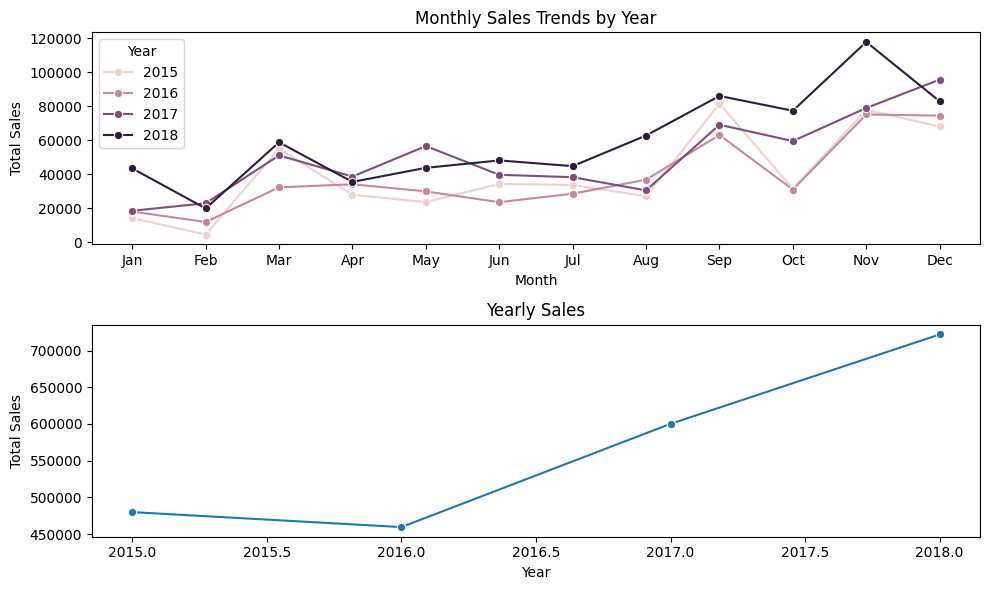

In [19]:
df["Order Month"] = df["Order Date"].dt.month
df["Order Year"] = df["Order Date"].dt.year

monthly_sales = df.groupby(["Order Year", "Order Month"])["Sales"].sum().reset_index()
yearly_sales = df.groupby(["Order Year"])["Sales"].sum().reset_index()

plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
sns.lineplot(data=monthly_sales, x="Order Month", y ="Sales", hue="Order Year", marker="o")

plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trends by Year")
plt.legend(title="Year")
plt.xticks(range(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

plt.subplot(2,1,2)
ax = sns.lineplot(data=yearly_sales, x="Order Year", y ="Sales", marker="o")

plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.title("Yearly Sales")
plt.xticks()

plt.tight_layout()
plt.show()

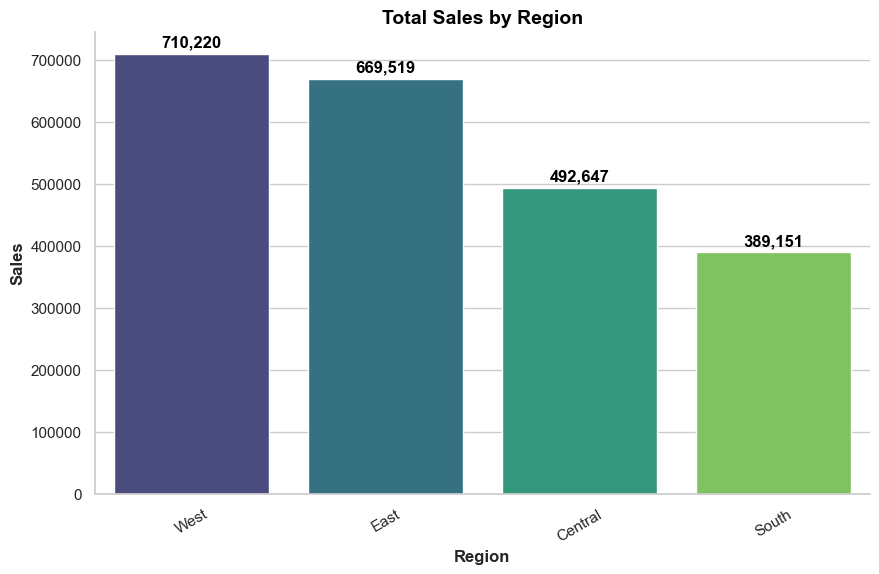

In [20]:
region_sales = df.groupby("Region")["Sales"].sum().reset_index()

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10,6))


ax=sns.barplot(
    data=region_sales.sort_values("Sales", ascending=False),
    x="Region",
    y="Sales",
    hue="Region",
    palette="viridis",
    legend=False
)

for i, row in region_sales.sort_values("Sales", ascending=False).reset_index().iterrows():
    ax.text(
        i, row["Sales"] + 0.01 * region_sales["Sales"].max(),  # Adjust the vertical positioning
        f'{row["Sales"]:,.0f}',  # Formatting: thousands separator, no decimals
        ha='center', va='bottom', fontweight='semibold', color='black'
    )

plt.xlabel("Region", fontsize=12, fontweight="bold")
plt.ylabel("Sales", fontsize=12, fontweight="bold")
plt.title("Total Sales by Region", fontsize=14, fontweight="bold", color='black')

plt.xticks(rotation=30,ha='center', fontsize=11)

sns.despine()

plt.show()

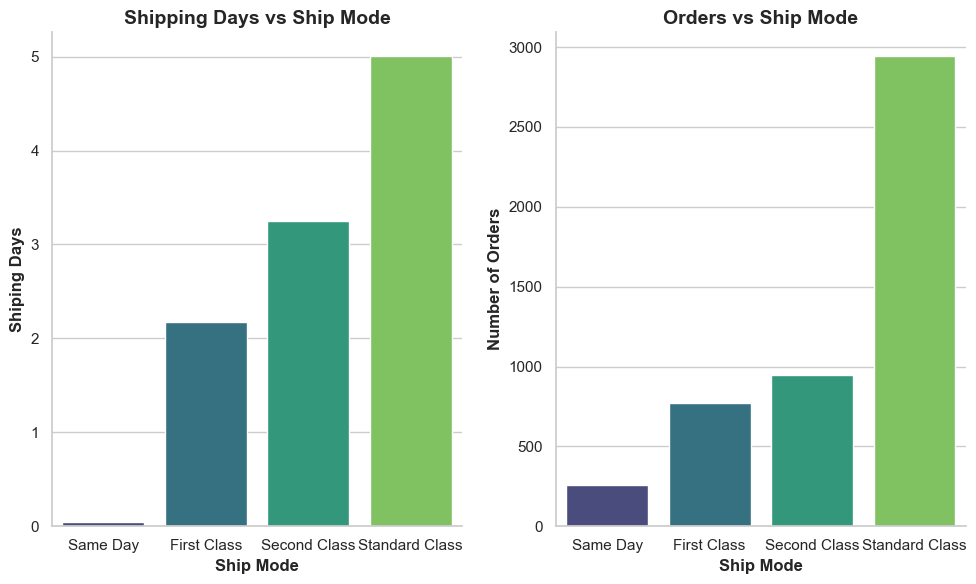

In [21]:
avg_ship_day = df.groupby("Ship Mode").agg({
    'Shipping Days':'mean',
    'Order ID':"nunique"
})

plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.barplot(
    data=avg_ship_day.sort_values("Shipping Days", ascending=True),
    x="Ship Mode",
    y="Shipping Days",
    hue="Ship Mode",
    legend=False,
    palette="viridis"
)

plt.xlabel("Ship Mode",fontsize=12, fontweight="bold")
plt.ylabel("Shiping Days", fontsize=12, fontweight="bold")
plt.title("Shipping Days vs Ship Mode", fontsize=14, fontweight="bold")

sns.despine()

plt.subplot(1,2,2)
sns.barplot(
    data=avg_ship_day.sort_values("Shipping Days", ascending=True),
    x="Ship Mode",
    y="Order ID",
    hue="Ship Mode",
    legend=False,
    palette="viridis"
)

plt.xlabel("Ship Mode",fontsize=12, fontweight="bold")
plt.ylabel("Number of Orders", fontsize=12, fontweight="bold")
plt.title("Orders vs Ship Mode", fontsize=14, fontweight="bold")

sns.despine()
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

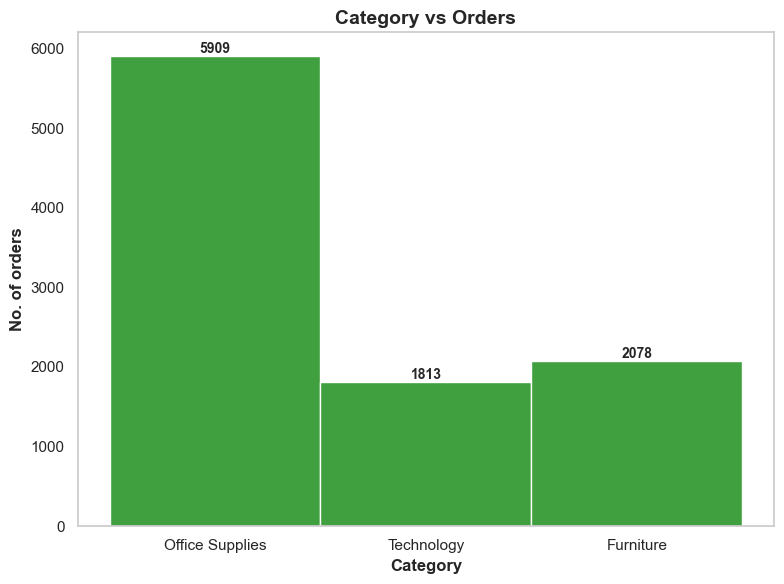

In [22]:
plt.figure(figsize=(8,6))

plt.grid(False)

ax = sns.histplot(data=df["Category"].reset_index(), x="Category",color="green")

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2,
            height,
            int(height),
            ha = "center", va ='bottom',
            fontsize = 10, fontweight = 'bold'
        )
                
                

plt.xlabel("Category",fontsize=12, fontweight="bold")
plt.ylabel("No. of orders", fontsize=12, fontweight="bold")
plt.title("Category vs Orders", fontsize=14, fontweight="bold")



plt.tight_layout()
plt.show

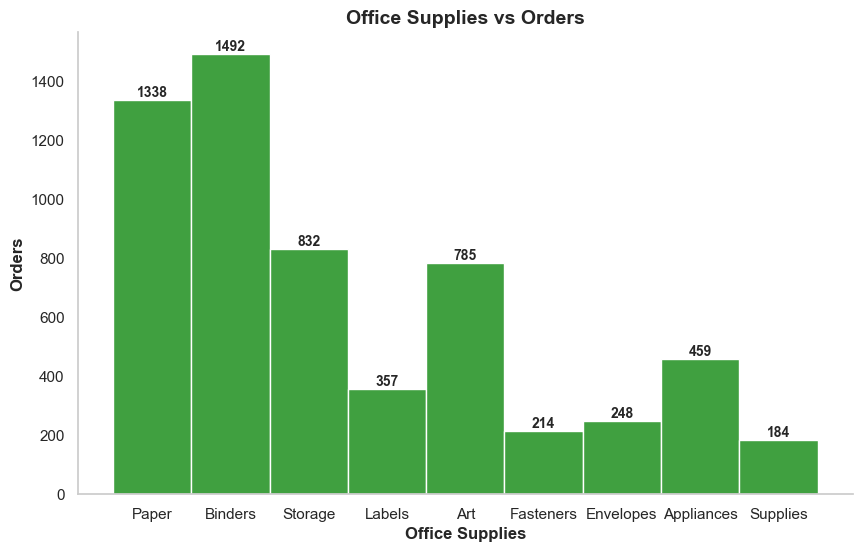

In [23]:
office_supplies=df[df["Category"]=="Office Supplies"]

plt.figure(figsize=(10,6))
plt.grid(False)
ax1 = sns.histplot(
    data=office_supplies,
    x="Sub-Category",
    color="green"
)

for p in ax1.patches:
    height = p.get_height()
    ax1.text(
        p.get_x() +p.get_width() / 2,
        height,
        int(height),
        ha = 'center', va = 'bottom',
        fontsize = 10, fontweight = 'bold'
    )

plt.xlabel("Office Supplies",fontsize=12, fontweight="bold")
plt.ylabel("Orders", fontsize=12, fontweight="bold")
plt.title("Office Supplies vs Orders", fontsize=14, fontweight="bold")

sns.despine()

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

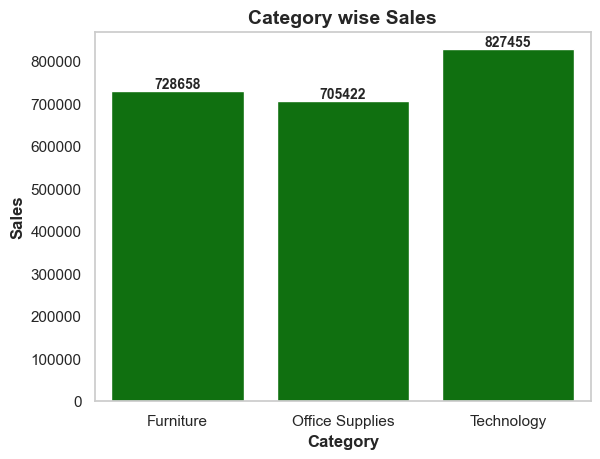

In [24]:
category_sales=df.groupby("Category")["Sales"].sum().reset_index()

plt.grid(False)

ax2 = sns.barplot(data=category_sales, x="Category", y="Sales", color="green")

for p in ax2.patches:
    height = p.get_height()
    ax2.text(
        p.get_x() +p.get_width() / 2,
        height,
        int(height),
        ha = 'center', va = 'bottom',
        fontsize = 10, fontweight = 'bold'
    )

plt.xlabel("Category",fontsize=12, fontweight="bold")
plt.ylabel("Sales", fontsize=12, fontweight="bold")
plt.title("Category wise Sales", fontsize=14, fontweight="bold")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

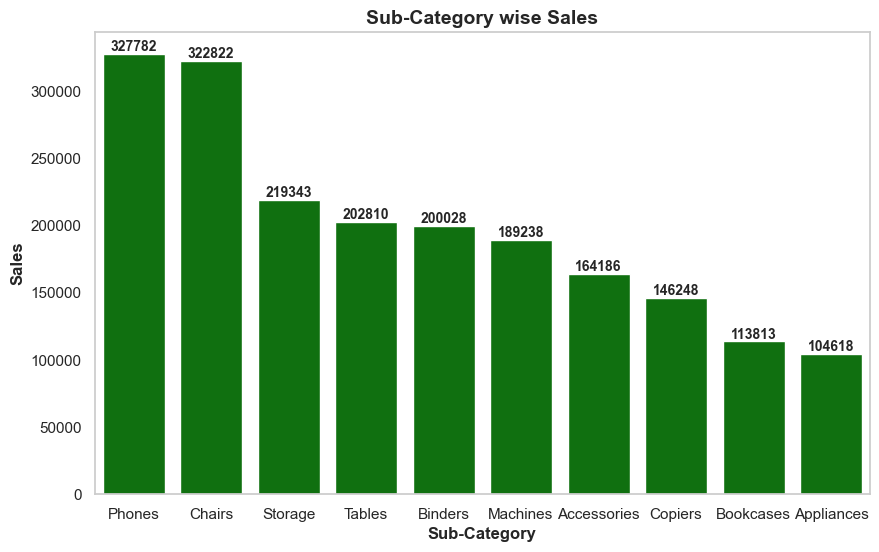

In [25]:
sub_category_sales=df.groupby("Sub-Category")["Sales"].sum().reset_index()
sub_category_sales=(sub_category_sales.nlargest(10,'Sales')).reset_index()

plt.figure(figsize=(10,6))
plt.grid(False)

ax4 = sns.barplot(data=sub_category_sales, x="Sub-Category", y="Sales", color="green")

for p in ax4.patches:
    height = p.get_height()
    ax4.text(
        p.get_x() +p.get_width() / 2,
        height,
        int(height),
        ha = 'center', va = 'bottom',
        fontsize = 10, fontweight = 'bold'
    )

plt.xlabel("Sub-Category",fontsize=12, fontweight="bold")
plt.ylabel("Sales", fontsize=12, fontweight="bold")
plt.title("Sub-Category wise Sales", fontsize=14, fontweight="bold")

plt.show

       Segment         Sales Sales_formatted
0     Consumer  1.148061e+06           1.15M
1    Corporate  6.884941e+05         688.49K
2  Home Office  4.249822e+05         424.98K


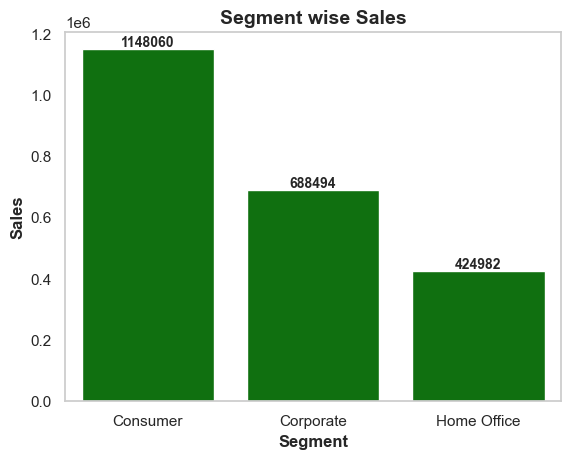

In [26]:
segment_sales=df.groupby("Segment")["Sales"].sum().reset_index()
segment_sales["Sales_formatted"] = segment_sales["Sales"].apply(lambda x:format_dollars(x))
print(segment_sales)
plt.grid(False)

ax5 = sns.barplot(data=segment_sales, x="Segment", y="Sales", color="green")

for p in ax5.patches:
    height = p.get_height()
    ax5.text(
        p.get_x() +p.get_width() / 2,
        height,
        int(height),
        ha = 'center', va = 'bottom',
        fontsize = 10, fontweight = 'bold'
    )

plt.xlabel("Segment",fontsize=12, fontweight="bold")
plt.ylabel("Sales", fontsize=12, fontweight="bold")
plt.title("Segment wise Sales", fontsize=14, fontweight="bold")

plt.show()

# Key Insights
### Sales Performance Trends:
Sales saw a decline from 2015 (479.8K) to 2016 (459.4K), followed by a sharp upturn in 2017 (600.1K) and 2018 (722.0K), indicating a period of recovery and growth in recent years.

### Monthly Sales Peaks:
March, September, and November consistently recorded the highest sales volumes, revealing clear seasonal demand cycles.

### Regional Sales Distribution:
The West region generated the highest sales (710.2K), trailed by the East (669.5K), Central (492.6K), and South (389.1K). The South region remains underpenetrated with significant growth potential.

### Shipping Performance:
Standard Class shipments averaged five days for delivery. The extended delivery time may be offset by cost benefits, such as free shipping, which drives customer selection of this mode.

### Category Sales Analysis:
While Office Supplies account for the highest number of units sold (5909), the Technology category delivers greater overall sales revenue (875.5K), underscoring its profit potential.

### Sub-Category Sales Insights:
Binders (1492) are the top-selling sub-category by unit count within Office Supplies. However, Phones in the Technology category generate the highest sales revenue (327.7K), followed by Chairs (322.8K). Binders (200.0K) rank fifth in overall sales value across sub-categories.

### Customer Segment Opportunities:
The Consumer segment leads in overall market sales (1.15M), highlighting its importance for revenue generation.

# Strategic Recommendations
### Targeted Regional Marketing:
Invest in targeted marketing and promotional activities within the South region to stimulate demand and realize untapped sales opportunities.

### Optimized Inventory Management:
Prioritize inventory planning for Office Supplies, with focused stocking of high-velocity items such as Binders and Paper to avoid stockouts and capture peak demand.

### Segment-Specific Incentives:
Implement discounts and tailored promotional campaigns for Corporate and Home Office segments to boost engagement and drive incremental sales in these customer groups.